In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from io import StringIO
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

In [57]:
# data downloaded from http://www.healthdata.org/covid/data-downloads
# each available file was renamed to 'Hops_xx_yy.csv' where xx is month and yy is day it was published
data_path = './ihme_data/'
files = [x for n, d, f in os.walk(data_path) for x in f]

In [58]:
# make one big dataframe including the publish date
def make_df(filename):
    tdf = pd.read_csv(os.path.join(data_path, filename))
    d = '2020-' + filename[-9:-4].replace('_', '-')
    tdf['publish_date'] = pd.to_datetime(d)
    return tdf

df = pd.concat([make_df(f) for f in files])
df['date'] = pd.to_datetime(df.date)

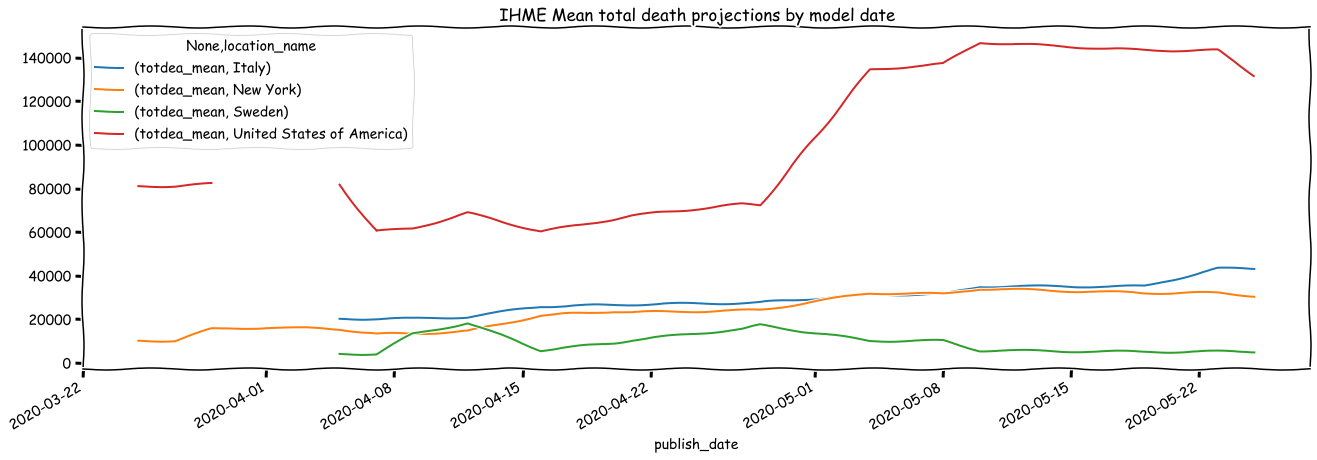

In [59]:
with plt.xkcd():
    plt.rcParams['figure.figsize'] = (22,7)
    df[df.location_name.isin(['Sweden', 'United States of America', 'New York', 'Italy'])].\
       groupby(['publish_date', 'location_name']).\
       agg({'totdea_mean': 'max'}).unstack().\
       plot(logy=False, title='IHME Mean total death projections by model date')


In [6]:
# let's make the real version of this graph https://www.realclearpolitics.com/articles/2020/05/21/how_fear_groupthink_drove_unnecessary_global_lockdowns_143253.html

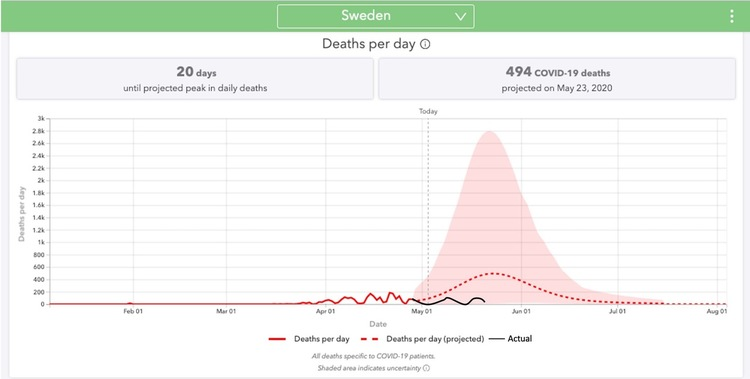

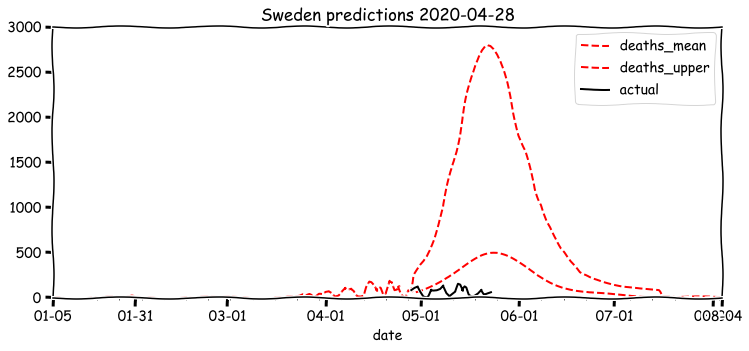

In [60]:
plt.rcParams['figure.figsize'] = (12,5)
with plt.xkcd():
    logy = False
    pred_date = '2020-04-28'
    latest_date = '2020-05-28'
    # predictions from a specific date
    ax = df.loc[
        (df.location_name=='Sweden')&(df.publish_date==pred_date),
        ['date', 'deaths_mean', 'deaths_upper']
    ].set_index('date').\
        plot(
            logy=logy,
            style=['r--','r--']
        )

    # now this is actual deaths from 5/25
    df.loc[
            (df.location_name=='Sweden')&(df.publish_date=='2020-05-25')&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
    ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
        plot(ax=ax, logy=logy, style=['k'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.set_ylim(-10, 3000)
    ax.set_title(f'Sweden predictions {pred_date}')
    
    ax.fill_between(
        df[(df.location_name=='Sweden')&(df.publish_date==pred_date)].date,
        df[(df.location_name=='Sweden')&(df.publish_date==pred_date)].deaths_upper, 
        alpha=0.2, color='r')

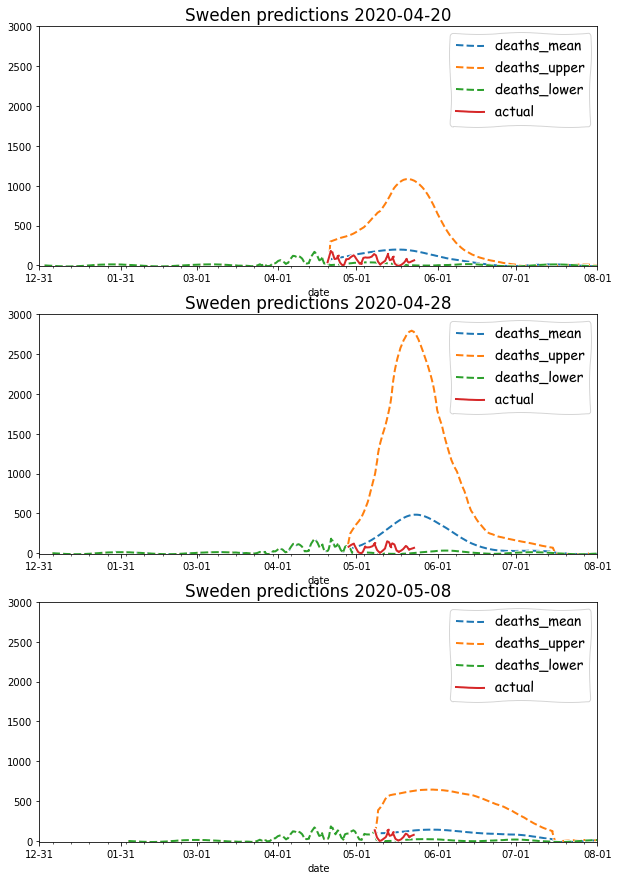

In [61]:
dates = ['2020-04-20', '2020-04-28', '2020-05-08']
latest_date = '2020-05-25'
country = 'Sweden'
fig, axs = plt.subplots(len(dates), figsize=(10, len(dates)*5))
logy = False
for (pred_date, ax) in zip(dates, axs):
    with plt.xkcd():
        # predictions from a specific date
        df.loc[
            (df.location_name==country)&(df.publish_date==pred_date),
            ['date', 'deaths_mean', 'deaths_upper', 'deaths_lower']
        ].set_index('date').\
            plot(
                logy=logy,
                style=['--','--','--'],
                ax=ax
            )

        # now this is actual deaths from pre_date through latest_date
        df.loc[
            (df.location_name==country)&(df.publish_date==latest_date)&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
        ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
            plot(ax=ax, logy=logy)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.set_ylim(-10, 3000)
        ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-08-01'))
        ax.set_title(f'{country} predictions {pred_date}')

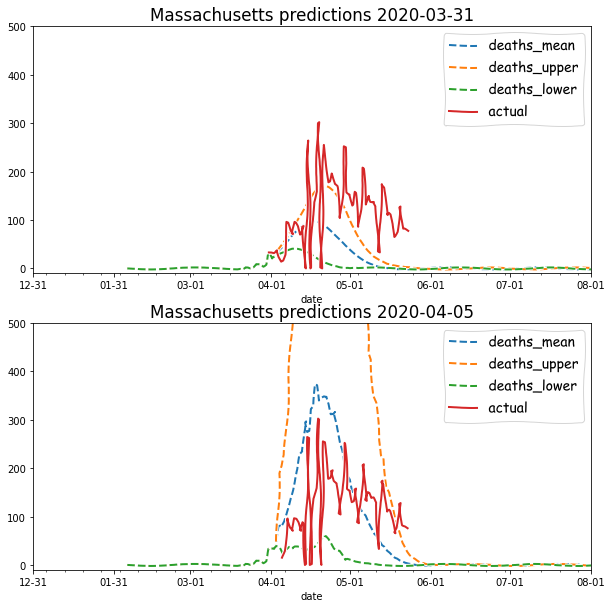

In [62]:
dates = ['2020-03-31','2020-04-05']
latest_date = '2020-05-25'
country = 'Massachusetts'
fig, axs = plt.subplots(len(dates), figsize=(10, len(dates)*5))
logy = False
for (pred_date, ax) in zip(dates, axs):
    with plt.xkcd():
        # predictions from a specific date
        df.loc[
            (df.location_name==country)&(df.publish_date==pred_date),
            ['date', 'deaths_mean', 'deaths_upper', 'deaths_lower']
        ].set_index('date').\
            plot(
                logy=logy,
                style=['--','--','--'],
                ax=ax
            )

        # now this is actual deaths from pre_date through latest_date
        df.loc[
            (df.location_name==country)&(df.publish_date==latest_date)&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
        ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
            plot(ax=ax, logy=logy)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.set_ylim(-10, 500)
        ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-08-01'))
        ax.set_title(f'{country} predictions {pred_date}')

In [14]:
df[df.location_name.isin(['Sweden', 'United States of America', 'Belgium'])].\
   groupby(['publish_date', 'location_name']).\
   agg({'totdea_mean': 'max', }).unstack()

totdea_mean                                    
location_name     Belgium     Sweden United States of America
publish_date                                                 
2020-03-25            NaN        NaN                81113.730
2020-03-26            NaN        NaN                81113.730
2020-03-27            NaN        NaN                81113.730
2020-03-29            NaN        NaN                82140.880
2020-04-05       3545.725   4182.126                81765.721
2020-04-07       3545.725   4182.126                60414.529
2020-04-09       4290.643  13258.985                61545.122
2020-04-12       6041.121  18322.490                68840.962
2020-04-16       8038.999   5890.243                60307.778
2020-04-20       8161.430   9190.531                65975.813
2020-04-21       8128.298  10584.055                67641.123
2020-04-27       7708.286  15624.975                72860.190
2020-04-28       7668.932  17337.316                72433.023
2020-05-04       9464.230  10196.008               134475.185
2020-05-08       9464.230  10196.008               137183.660
2020-05-10      10593.900   5759.774               147040.153
2020-05-19      10454.484   5129.153               143357.040
2020-05-23       9698.804   5257.798               143357.040
2020-05-25       9698.804   5257.798               131967.026